<a href="https://colab.research.google.com/github/pipppppppp/kuis-pluginhelina/blob/main/Pertemuan7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
#mengimport library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [31]:
#mengimport dataset
#membuat inputan dengan 2 fitur saja
dataset = pd.read_csv('Iklan_sosmed.csv')
x = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values
print(dataset)

      User ID    Kelamin  Usia  EstimasiGaji  Beli
0    15624510       Laki    19         19000     0
1    15810944       Laki    35         20000     0
2    15668575  Perempuan    26         43000     0
3    15603246  Perempuan    27         57000     0
4    15804002       Laki    19         76000     0
..        ...        ...   ...           ...   ...
395  15691863  Perempuan    46         41000     1
396  15706071       Laki    51         23000     1
397  15654296  Perempuan    50         20000     1
398  15755018       Laki    36         33000     0
399  15594041  Perempuan    49         36000     1

[400 rows x 5 columns]


In [32]:
#membagi dataset kedalam training set dan test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [33]:
#preprocessing dengan feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [34]:
#membuat model SVM terhadap Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'poly', random_state = 0)
classifier.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [35]:
#memprediksi hasil test set
y_pred = classifier.predict(x_test)

In [36]:
#membuat confution matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[67  1]
 [13 19]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


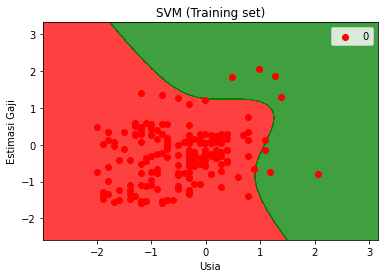

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


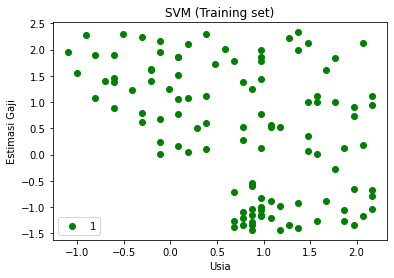

In [37]:
#menampilkan ploting grafik hasil training set
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
               c = ListedColormap(('red', 'green'))(i), label = j)
  plt.title('SVM (Training set)')
  plt.xlabel('Usia')
  plt.ylabel('Estimasi Gaji')
  plt.legend()
  plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


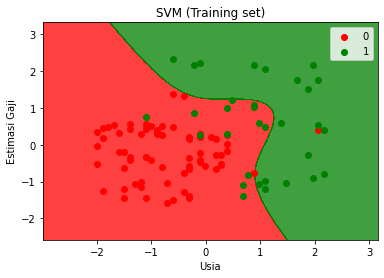

In [44]:
# Visualisasi model SVM terhadap Test set
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
               c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Usia')
plt.ylabel('Estimasi Gaji')
plt.legend()
plt.show()